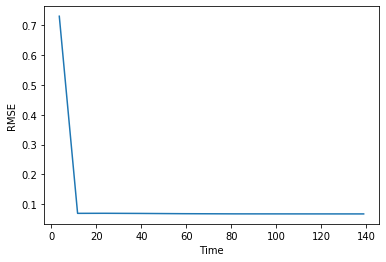

In [162]:
import numpy as np
import numpy.matlib
from matplotlib import pyplot as plt
import pandas as pd
from scipy.sparse import csr_matrix
# this package is from https://www.cc.gatech.edu/~hpark/nmfsoftware.php


R, static, dynamic = 5, "static.csv", "dynamic.csv"


A = pd.read_csv(static, header = 0)
A = A[A["is_case"] == 1]
XK = pd.read_csv(dynamic, header = 0)

K, P = A.shape
X_height = XK.shape[0]
J = max(XK["code"])
X = []
j = 0
for k in range(K):
    while j < X_height and A.iloc[k, 0] != XK.iloc[j, 0]:
        j += 1
    start = j
    while j < X_height and A.iloc[k, 0] == XK.iloc[j, 0]:
        j += 1
    X.append(XK.iloc[start : j, 1:])

A = A.iloc[:, 1:-1]

for k in range(K):
    X[k] = csr_matrix(([1 for _ in range(X[k].shape[0])], ((X[k]["r"]-1), (X[k]["code"]-1))), shape = (X[k]["r"].iloc[-1], J))

# A = np.ones(12494, 1)
A = A.to_numpy()
data_name = "CMS"

lambda_ = 1
mu = 1
conv_tol = 1e-4 #converegance tolerance
PARFOR_FLAG = 0 #parallel computing

import importlib
import sys
if "C:\\Users\\xli858\\Desktop\\TASTE" not in sys.path:
    sys.path.append("C:\\Users\\xli858\\Desktop\\TASTE")

import taste_frame
import nonnegfac
importlib.reload(taste_frame)
importlib.reload(nonnegfac)

normX, normA, Size_input = taste_frame.claculate_norm(X,A,K,PARFOR_FLAG) #Calculate the norm of the input X
Constraints = ['nonnegative', 'nonnegative','nonnegative','nonnegative']

itr = 5
seed = 1

TOTAL_running_TIME,rmse,FIT_Tensor,FIT_Matrix,RMSE_TIME,U,Q,H,V,W,F = taste_frame.TASTE_BPP(X,A,R,conv_tol,seed,PARFOR_FLAG,normX,normA,Size_input,Constraints,mu,lambda_)

fig = plt.figure()

plt.plot([tup[0] for tup in RMSE_TIME], [tup[1] for tup in RMSE_TIME])
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.savefig(str(R) + ".png")

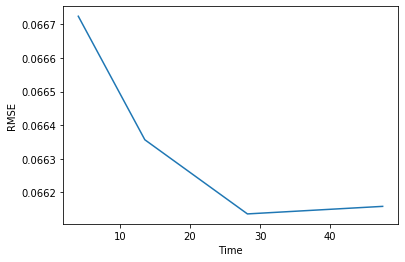

In [163]:
A = pd.read_csv(static, header = 0)
A = A[A["is_case"] == 0]
XK = pd.read_csv(dynamic, header = 0)

K, P = A.shape
X_height = XK.shape[0]
J = max(XK["code"])
X = []
j = 0
for k in range(K):
    while j < X_height and A.iloc[k, 0] != XK.iloc[j, 0]:
        j += 1
    start = j
    while j < X_height and A.iloc[k, 0] == XK.iloc[j, 0]:
        j += 1
    X.append(XK.iloc[start : j, 1:])

A = A.iloc[:, 1:-1]

for k in range(K):
    X[k] = csr_matrix(([1 for _ in range(X[k].shape[0])], ((X[k]["r"]-1), (X[k]["code"]-1))), shape = (X[k]["r"].iloc[-1], J))

# A = np.ones(12494, 1)
A = A.to_numpy()
data_name = "CMS"

lambda_ = 1
mu = 1
conv_tol = 1e-4 #converegance tolerance
PARFOR_FLAG = 0 #parallel computing

import importlib
import sys
if "C:\\Users\\xli858\\Desktop\\TASTE" not in sys.path:
    sys.path.append("C:\\Users\\xli858\\Desktop\\TASTE")

import taste_frame
import nonnegfac
importlib.reload(taste_frame)
importlib.reload(nonnegfac)

normX, normA, Size_input = taste_frame.claculate_norm(X,A,K,PARFOR_FLAG) #Calculate the norm of the input X
Constraints = ['nonnegative', 'nonnegative','nonnegative','nonnegative']

itr = 5
seed = 1

import PARACoupl2_BPP
importlib.reload(PARACoupl2_BPP)

TOTAL_running_TIME,RMSE,FIT_T,FIT_M,RMSE_TIME,U,Q,H,V,W,F = PARACoupl2_BPP.PARACoupl2_BPP( X,A,V,F,H,R,conv_tol,seed,PARFOR_FLAG,normX,normA,Size_input,Constraints,mu,lambda_ )

fig = plt.figure()

plt.plot([tup[0] for tup in RMSE_TIME], [tup[1] for tup in RMSE_TIME])
plt.xlabel("Time")
plt.ylabel("RMSE")
plt.savefig(str(R) + "_projection.png")
